In [40]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [41]:
exp6 = pd.read_csv("salaries.csv")
exp6.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [42]:
X = exp6.drop('salary_more_then_100k', axis=1)
y = exp6['salary_more_then_100k']

In [43]:
X_encoded = pd.get_dummies(X)

In [44]:
X_train_encoded, X_test_encoded, y_train, y_test = train_test_split(X_encoded,y, test_size=0.25, random_state=20)

In [45]:
DT = DecisionTreeClassifier()
DT.fit(X_train_encoded,y_train)

DecisionTreeClassifier()

In [46]:
y_pred = DT.predict(X_test_encoded)

In [47]:
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy is:",accuracy)

Accuracy is: 0.75


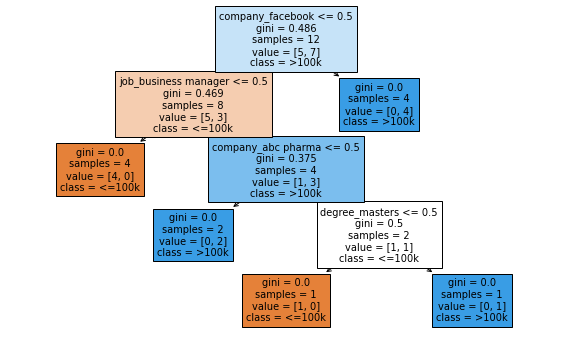

In [51]:
plt.figure(figsize=(10,6))
plot_tree(DT,filled=True,feature_names=X_encoded.columns, class_names=['<=100k','>100k'])
plt.show()

In [52]:
#titanic dataset
titanic = pd.read_csv("titanic.csv")

In [53]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [54]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [56]:
titanic = titanic.drop(['PassengerId','Name','Ticket','Cabin','Embarked'],axis=1)

In [58]:
titanic.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [60]:
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)

In [66]:
X = titanic.drop('Survived',axis=1)
y = titanic['Survived']

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=20)

In [68]:
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train )

DecisionTreeClassifier()

In [69]:
y_pred = clf.predict(X_test)

In [70]:
accuracy = accuracy_score(y_test,y_pred)

In [71]:
conf_matrix = confusion_matrix(y_test,y_pred)

In [73]:
print("Accuracy:",accuracy)
print("Confusion matrix:\n",conf_matrix)

Accuracy: 0.7653631284916201
Confusion matrix:
 [[92 20]
 [22 45]]


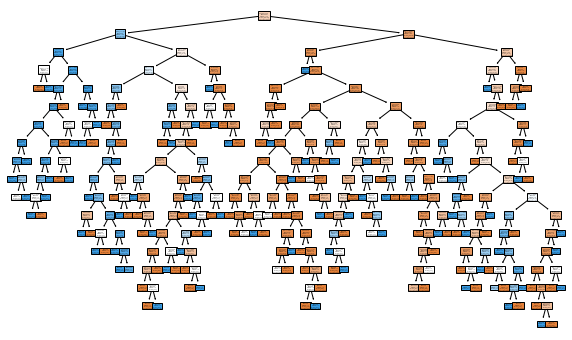

In [74]:
plt.figure(figsize=(10,6))
plot_tree(clf,feature_names=X.columns,class_names=['Not survived','Survived'], filled=True)
plt.show()